
## Практическое задание

Используем набор примеров fashion-MNIST

1.  Опишите - какой результата получен в нейросети в зависимости от:
  -  числа нейронов в слое(для 2-хслойной сети),
  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).
  - фиксируйте для тренировочного и тестового набора метрики accuracy.
2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе?

4. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность). Сделайте вывод.



#%
%

In [1]:
# Код нейронной сети в Keras!
###############################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import mnist
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


(train_imagesi,train_labels),(test_imagesi,test_labels)=mnist.load_data()

# приведем изображение к диапазону (-1,1).
train_images = (train_imagesi / 127) - 1
test_images = (test_imagesi / 127) - 1

# делаем векторизацию, т.к. наши слои полносвязные и хотят на вход вектор.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

y_t = to_categorical( train_labels)
y_tt = to_categorical(test_labels)

## Задача 1



layer2: neuron_10, neuron_20, neuron_30, neuron_40, neuron_50, neuron_60, neuron_70, neuron_80, neuron_90,  
layer3: neuron_10, neuron_20, neuron_30, neuron_40, neuron_50, neuron_60, neuron_70, neuron_80, neuron_90,  
layer5: neuron_10, neuron_20, neuron_30, neuron_40, neuron_50, neuron_60, neuron_70, neuron_80, neuron_90,  
layer10: neuron_10, neuron_20, neuron_30, neuron_40, neuron_50, neuron_60, neuron_70, neuron_80, neuron_90,  


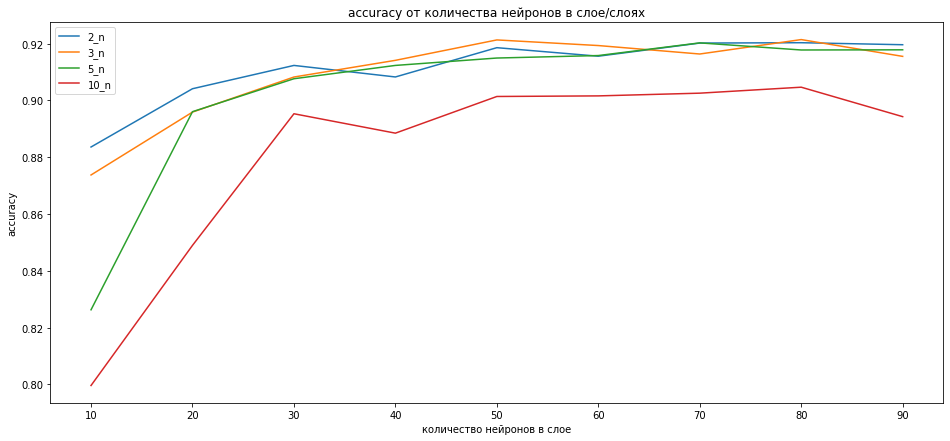

In [2]:
#1.  Опишите - какой результата получен в нейросети в зависимости от:
# -  числа нейронов в слое(для 2-хслойной сети),
# - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).
# - фиксируйте для тренировочного и тестового набора метрики accuracy.

# число рабочих эпох
epochs =4
# вектор для выводв результатов
epoch = np.arange(epochs+1)

start_neuron = 10
finish_neuron = 100
step_neuron = 10
fabric_neuron = range(start_neuron,finish_neuron,step_neuron)
plt.figure(figsize=(16,7))

for layer in [2,3,5,10]:
    accuracy_graph = pd.DataFrame({'x' : [x for x in fabric_neuron], 'y' : [0 for x in fabric_neuron] }, dtype='float').set_index('x')
    print(f'layer{layer}: ',end='')
    for i_n in fabric_neuron:
        print(f'neuron_{i_n}, ',end='')
        model_q1 = Sequential(name='model_q1')
        model_q1.add(Dense(      128, activation='relu', input_shape=(784,)))

        for k in range(layer-1):
            # Добавляем скрытые слои k из нейронов с активацией tanh
            model_q1.add(Dense(i_n, activation='tanh'))
        model_q1.add(Dense(10, activation='softmax'))

        # Compile the model.
        model_q1.compile(
            optimizer=keras.optimizers.RMSprop(),
            loss='categorical_crossentropy',
            metrics=['accuracy'],
        )
        # Train the model.
        hist = model_q1.fit(
          train_images[:,:],

          y_t[:,:],
            epochs=epochs,
            batch_size=1000,
            validation_split=0.2,
            verbose=0,
        )
        accuracy_graph['y'][i_n] = hist.history['accuracy'][-1]

    
    plt.plot(accuracy_graph, label = str(layer) + '_n')
    print(f' ')

plt.xlabel('количество нейронов в слое')
plt.ylabel('accuracy')
plt.legend()
#plt.grid('On')
plt.title('accuracy от количества нейронов в слое/слоях')
plt.show()



## Вывод по 1 задаче:

Запуск производил 3 раза, результат идентичный.
Чем больше слоистая структура тем конечный результат менее точен
Более 40 нейронов в структуре слоя уже сильно на точность не влияют.
Обучаемость на меньшей слоистости происходит быстрее!


## Задача 2
2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.



RMSprop: 
	layer2: neuron_40, Epoch 1/4
Epoch 2/4
Epoch 3/4
Epoch 4/4
 
SGD: 
	layer2: neuron_40, Epoch 1/4
Epoch 2/4
Epoch 3/4
Epoch 4/4
 
Adam: 
	layer2: neuron_40, Epoch 1/4
Epoch 2/4
Epoch 3/4
Epoch 4/4
 


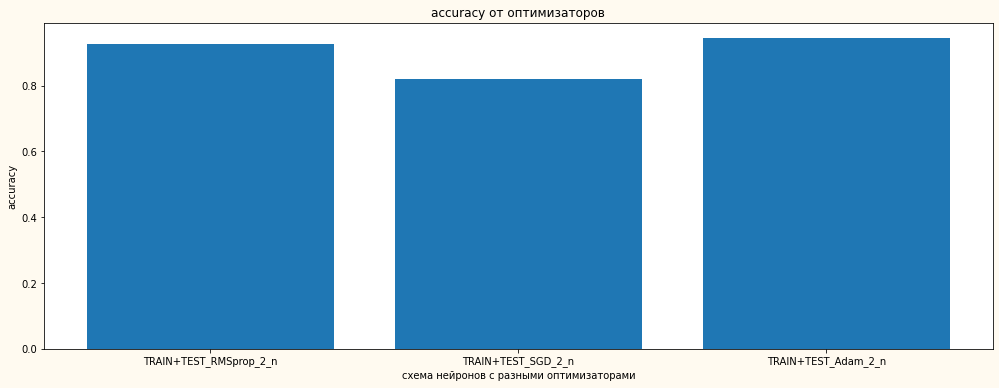

In [3]:
from keras.models import load_model
# число рабочих эпох
epochs =4
# вектор для выводв результатов
epoch = np.arange(epochs+1)

fig, ax = plt.subplots()

layer = 2
i_n = 40
x_y = {}


for i_optim in [keras.optimizers.RMSprop(),keras.optimizers.SGD(),keras.optimizers.Adam()]:
    print(f'{i_optim._name}: ')
    print(f'\tlayer{layer}: ',end='')
    print(f'neuron_{i_n}, ',end='')
    model_q2 = Sequential(name='model_q2')
    model_q2.add(Dense(      128, activation='relu', input_shape=(784,)))

    for k in range(layer-1):
        # Добавляем скрытые слои k из нейронов с активацией tanh
        model_q2.add(Dense(i_n, activation='tanh'))
    model_q2.add(Dense(10, activation='softmax'))

    # Compile the model.
    model_q2.compile(
        optimizer=i_optim,
        loss='categorical_crossentropy',
        metrics=['accuracy'],
    )
    # Train the model.
    hist_train = model_q2.fit(
      train_images[:,:],

      y_t[:,:],
        epochs=epochs,
        batch_size=1000,
        validation_data=(test_images[:,:],y_tt),
        verbose=3,
    )

    x_y['TRAIN+TEST_' + i_optim._name + '_' + str(layer) + '_n'] = hist_train.history['accuracy'][-1]
    print(f' ')

plt.xlabel('схема нейронов с разными оптимизаторами')
plt.ylabel('accuracy')
ax.bar(x_y.keys(), x_y.values())
fig.set_facecolor('floralwhite')
fig.set_figwidth(17)
fig.set_figheight(6)

plt.title('accuracy от оптимизаторов')
plt.show()

## Вывод по задаче 2

Наиболее динамичное обучение нейронов показал алгоритм Adam


## Задача 3

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе?

## Вывод
Согласно задаче, в качестве валидации в методе fit я указал тестовый набор.
Улучшает качество классификации применение различных алгоритмов, в данном случае лучшим показал ADAM.


## Задача 4
4. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность). Сделайте вывод.





In [9]:

layer = 2
i_n = 40

print(f'\tlayer{layer}: ',end='')
print(f'neuron_{i_n}, ',end='')
model_q4 = Sequential(name='model_q4')
model_q4.add(Dense(      128, activation='relu', input_shape=(784,)))

for k in range(layer-1):
    # Добавляем скрытые слои k из нейронов с активацией tanh
    model_q4.add(Dense(i_n, activation='tanh'))
model_q4.add(Dense(10, activation='softmax'))

model_q4.save('model_q4.h5')

# Compile the model.
model_q4.compile(
    optimizer=keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)
# Train the model.
hist_train = model_q4.fit(
    train_images[:,:],
    y_t[:,:],
    epochs=epochs,
    batch_size=1000,
    validation_split=.2,
    verbose=1,
)

	layer2: neuron_40, WARNING:tensorflow:Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.
Epoch 1/4
48/48 [==============================] - 5s 42ms/step - loss: 1.3841 - accuracy: 0.5803 - val_loss: 0.4620 - val_accuracy: 0.8863

313/313 [==============================] - 2s 5ms/step - loss: 0.2231 - accuracy: 0.9400

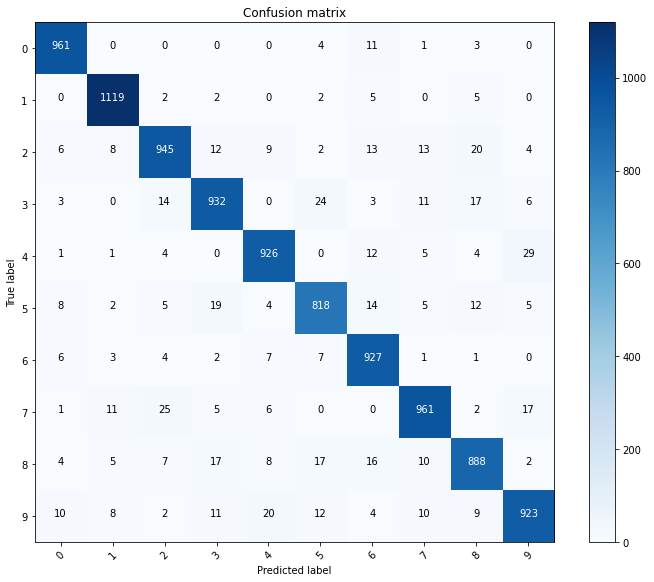

In [16]:
# Воспользуемся функцией построения матрицы ошибок из документации sklearn
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Evaluate the model.
model_q4.evaluate(
  test_images,
  y_tt
)

from sklearn.metrics import confusion_matrix, classification_report


# Predict on all images.
predictions = model_q4.predict(test_images[:])
y_pred_class = np.argmax(predictions, axis=1)

plt.figure(figsize=(10, 8))
plot_confusion_matrix(confusion_matrix(test_labels, y_pred_class), classes=[i for i in range(0,10)],
                      title='Confusion matrix')
plt.show()
#data = pd.DataFrame({'test_labels' : test_labels, 'y_pred_class' : y_pred_class }, dtype='int')


print(classification_report(test_labels, y_pred_class))

Вывод: судя по отчёту пресижн и рекол довольно высокие по предсказанию выше 0.91, но к сожалению я с нормами нейронок не сталкивался и не могу сказать много это или мало. 
